In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.ar_model import AutoReg

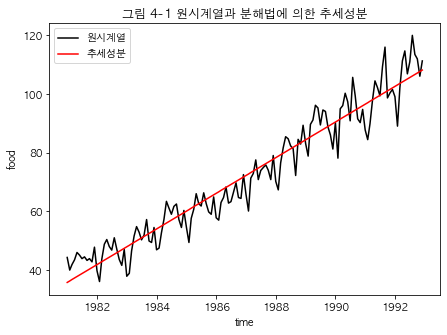

In [2]:
# Example 4.1
z = []

with open('../data/food.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))

index = pd.date_range(start="1981", periods=len(z), freq="MS")
data = pd.Series(z, index)
t = np.arange(len(z)).reshape(-1, 1)
t_ = sm.add_constant(t)

lm = sm.OLS(data, t_)
res = lm.fit()

trend = res.fittedvalues

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="원시계열")
ax.plot(trend, 'red', label="추세성분")
ax.set_xlabel("time")
ax.set_ylabel("food")
ax.set_title("그림 4-1 원시계열과 분해법에 의한 추세성분")
plt.legend()
plt.show()

/Users/jonghyun/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/Users/jonghyun/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


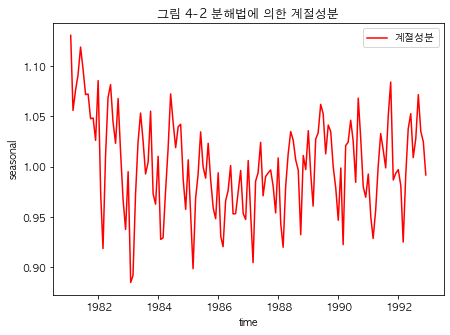

In [3]:
adjtrend = data / trend
y = pd.get_dummies(data.index.month).values

auto_reg = AutoReg(adjtrend, 1)
res = auto_reg.fit()

seasonal = res.fittedvalues
pred = trend * seasonal
irregular = data / pred

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(seasonal, 'red', label="계졀성분")
ax.set_xlabel("time")
ax.set_ylabel("seasonal")
ax.set_title("그림 4-2 분해법에 의한 계절성분")
plt.legend()
plt.show()

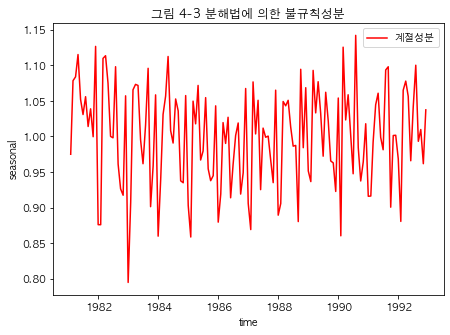

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(irregular, 'red', label="계졀성분")
ax.set_xlabel("time")
ax.set_ylabel("seasonal")
ax.set_title("그림 4-3 분해법에 의한 불규칙성분")
plt.legend()
plt.show()

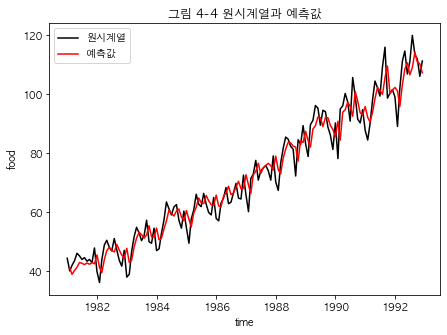

In [5]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="원시계열")
ax.plot(pred, 'red', label="예측값")
ax.set_xlabel("time")
ax.set_ylabel("food")
ax.set_title("그림 4-4 원시계열과 예측값")
plt.legend()
plt.show()

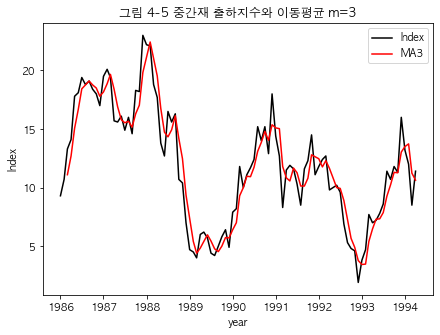

In [6]:
# Example 4.2
z = []

with open('../data/mindex.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))

index = pd.date_range(start="1986", periods=len(z), freq="MS")
data = pd.Series(z, index)

m3 = data.rolling(3).mean()

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="Index")
ax.plot(m3, 'red', label="MA3")
ax.set_xlabel("year")
ax.set_ylabel("Index")
ax.set_title("그림 4-5 중간재 출하지수와 이동평균 m=3")
plt.legend()
plt.show()

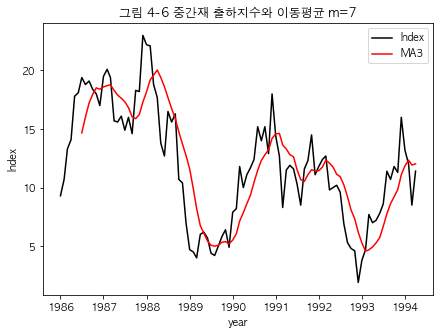

In [7]:
m7 = data.rolling(7).mean()

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="Index")
ax.plot(m7, 'red', label="MA3")
ax.set_xlabel("year")
ax.set_ylabel("Index")
ax.set_title("그림 4-6 중간재 출하지수와 이동평균 m=7")
plt.legend()
plt.show()

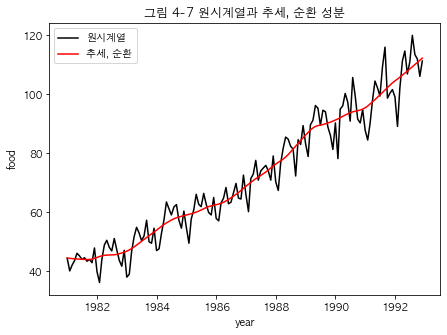

In [8]:
# Example 4.3
z = []

with open('../data/food.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))

index = pd.date_range(start="1981", periods=len(z), freq="MS")
data = pd.Series(z, index)

stl = STL(data, seasonal=13)
res = stl.fit()

trend = res.trend
seasonal = res.seasonal
irregular = res.resid
adjseasonal = data - seasonal

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="원시계열")
ax.plot(trend, 'red', label="추세, 순환")
ax.set_xlabel("year")
ax.set_ylabel("food")
ax.set_title("그림 4-7 원시계열과 추세, 순환 성분")
plt.legend()
plt.show()

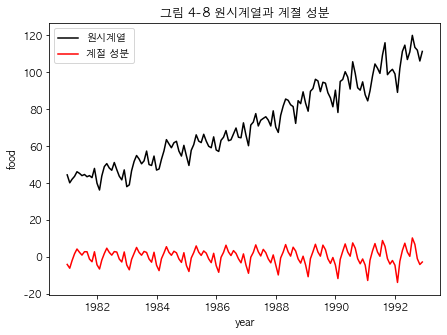

In [9]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="원시계열")
ax.plot(seasonal, 'red', label="계절 성분")
ax.set_xlabel("year")
ax.set_ylabel("food")
ax.set_title("그림 4-8 원시계열과 계졀 성분")
plt.legend()
plt.show()

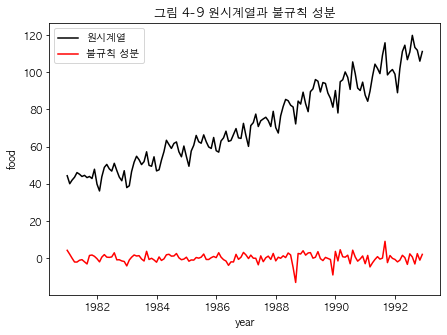

In [10]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="원시계열")
ax.plot(irregular, 'red', label="불규칙 성분")
ax.set_xlabel("year")
ax.set_ylabel("food")
ax.set_title("그림 4-9 원시계열과 불규칙 성분")
plt.legend()
plt.show()

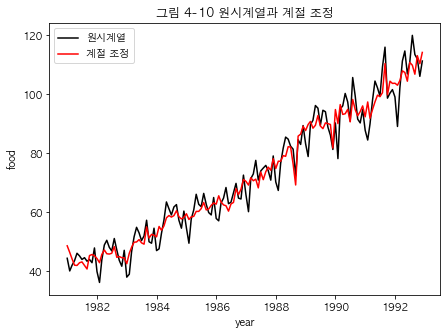

In [11]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="원시계열")
ax.plot(adjseasonal, 'red', label="계절 조정")
ax.set_xlabel("year")
ax.set_ylabel("food")
ax.set_title("그림 4-10 원시계열과 계절 조정")
plt.legend()
plt.show()

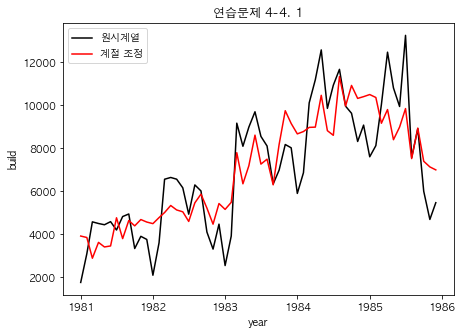

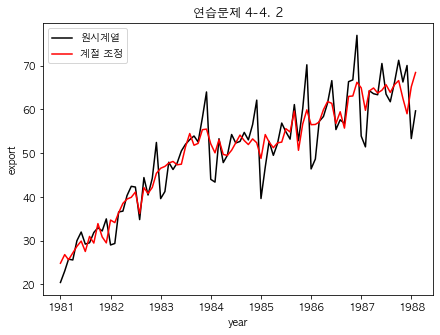

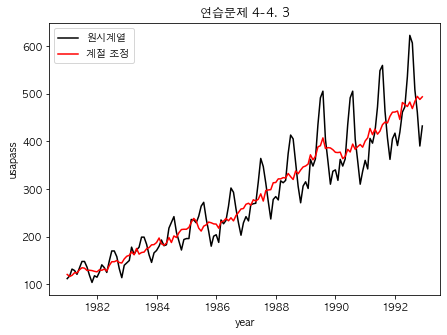

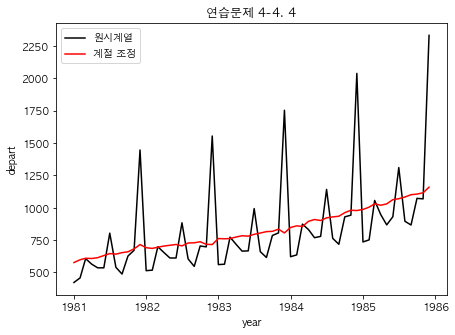

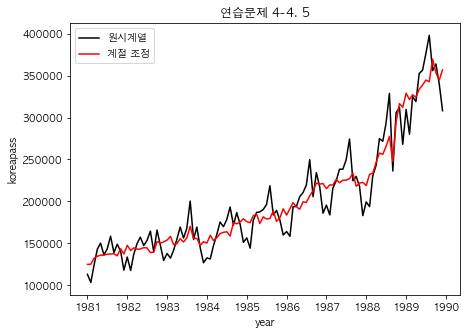

In [12]:
# Exercise 4-4
import os 

def plot_decomposed_series(fname, number):
    z = []
    fpath = os.path.join("../data", fname)
    
    with open(fpath) as f:
        for line in f.readlines():
            for elem in line.rstrip().split(" "):
                if len(elem):
                    z.append(float(elem))

    index = pd.date_range(start="1981", periods=len(z), freq="MS")
    data = pd.Series(z, index)

    stl = STL(data, seasonal=13)
    res = stl.fit()

    trend = res.trend
    seasonal = res.seasonal
    irregular = res.resid
    adjseasonal = data - seasonal
    
    generate_figure(data, adjseasonal, fname.split(".")[0], number)


def generate_figure(data, adj, ylabel, number):
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.plot(data, 'black', label="원시계열")
    ax.plot(adj, 'red', label="계절 조정")
    ax.set_xlabel("year")
    ax.set_ylabel(ylabel)
    ax.set_title(f"연습문제 4-4. {number}")
    plt.legend()
    plt.show()
    
    
for i, fname in enumerate(["build.txt", "export.txt", "usapass.txt", "depart.txt", "koreapass.txt"]):
    plot_decomposed_series(fname, i + 1)